In [19]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Load the dataset again
file_path = 'The Rise Of Artificial Intellegence2.csv'
df = pd.read_csv(file_path)

# Convert percentage strings to float
df['AI Adoption (%)'] = df['AI Adoption (%)'].str.rstrip('%').astype(float)
df['Estimated Jobs Eliminated by AI (millions)'] = df['Estimated Jobs Eliminated by AI (millions)'].str.rstrip('%').astype(float)
df['Estimated New Jobs Created by AI (millions)'] = df['Estimated New Jobs Created by AI (millions)'].str.rstrip('%').astype(float)


In [21]:
# Line Chart - AI Adoption over the Years
line_fig = px.line(df, x='Year', y='AI Adoption (%)', title='AI Adoption Over the Years', markers=True)
line_fig.show()

In [22]:
# Bar Chart - AI Software Revenue and Global AI Market Value
bar_fig = go.Figure()
bar_fig.add_trace(go.Bar(x=df['Year'], y=df['AI Software Revenue(in Billions)'], name='AI Software Revenue (in Billions)', marker_color='blue'))
bar_fig.add_trace(go.Bar(x=df['Year'], y=df['Global AI Market Value(in Billions)'], name='Global AI Market Value (in Billions)', marker_color='orange'))

bar_fig.update_layout(barmode='group', title='AI Software Revenue and Global Market Value', xaxis_title='Year', yaxis_title='Revenue (Billions)')
bar_fig.show()


In [23]:
# Pie Chart - Estimated Jobs Eliminated vs Created by AI
pie_fig = go.Figure(data=[go.Pie(labels=['Jobs Eliminated', 'Jobs Created'],
                                 values=[df['Estimated Jobs Eliminated by AI (millions)'].sum(), 
                                         df['Estimated New Jobs Created by AI (millions)'].sum()])])
pie_fig.update_layout(title_text='Estimated Jobs Eliminated vs Created by AI')
pie_fig.show()

In [24]:
# Area Chart - AI Adoption and Jobs Created
area_fig = px.area(df, x='Year', y='AI Adoption (%)', title='AI Adoption Growth Over the Years', labels={'AI Adoption (%)': 'AI Adoption (%)'})
area_fig.show()

In [25]:
# Chuyển đổi các cột sang float nếu cần thiết
if df['Jobs at High Risk of Automation - Transportation & Storage (%)'].dtype == 'object':
    df['Jobs at High Risk of Automation - Transportation & Storage (%)'] = df['Jobs at High Risk of Automation - Transportation & Storage (%)'].str.rstrip('%').astype(float)

if df['Jobs at High Risk of Automation - Wholesale & Retail Trade'].dtype == 'object':
    df['Jobs at High Risk of Automation - Wholesale & Retail Trade'] = df['Jobs at High Risk of Automation - Wholesale & Retail Trade'].str.rstrip('%').astype(float)

if df['Jobs at High Risk of Automation - Manufacturing'].dtype == 'object':
    df['Jobs at High Risk of Automation - Manufacturing'] = df['Jobs at High Risk of Automation - Manufacturing'].str.rstrip('%').astype(float)

# Vẽ lại biểu đồ với các cột đã chuyển đổi thành float và trục Y từ 0 đến 100%
fig = go.Figure()

# Thêm các đường biểu diễn cho từng ngành
fig.add_trace(go.Scatter(x=df['Year'], y=df['Jobs at High Risk of Automation - Transportation & Storage (%)'],
                         mode='lines+markers', name='Transportation & Storage (%)'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['Jobs at High Risk of Automation - Wholesale & Retail Trade'],
                         mode='lines+markers', name='Wholesale & Retail (%)'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['Jobs at High Risk of Automation - Manufacturing'],
                         mode='lines+markers', name='Manufacturing (%)'))

# Cập nhật tiêu đề và nhãn trục, giới hạn trục Y từ 0 đến 100%
fig.update_layout(title='Jobs at High Risk of Automation',
                  xaxis_title='Year', yaxis_title='High Risk of Automation (%)',
                  yaxis=dict(range=[0, 100]))

# Hiển thị biểu đồ
fig.show()


In [26]:
# Kiểm tra và chuyển đổi cột "Net Job Loss in the US" sang dạng float nếu cần
if df['Net Job Loss in the US'].dtype == 'object':
    df['Net Job Loss in the US'] = df['Net Job Loss in the US'].str.rstrip('%').astype(float)

# Vẽ biểu đồ Net Job Loss in the US
fig = go.Figure()

# Thêm đường biểu diễn cho Net Job Loss
fig.add_trace(go.Scatter(x=df['Year'], y=df['Net Job Loss in the US'],
                         mode='lines+markers', name='Net Job Loss in the US'))

# Cập nhật tiêu đề và nhãn trục
fig.update_layout(title='Net Job Loss in the US',
                  xaxis_title='Year', yaxis_title='Net Job Loss (%)')

# Hiển thị biểu đồ
fig.show()

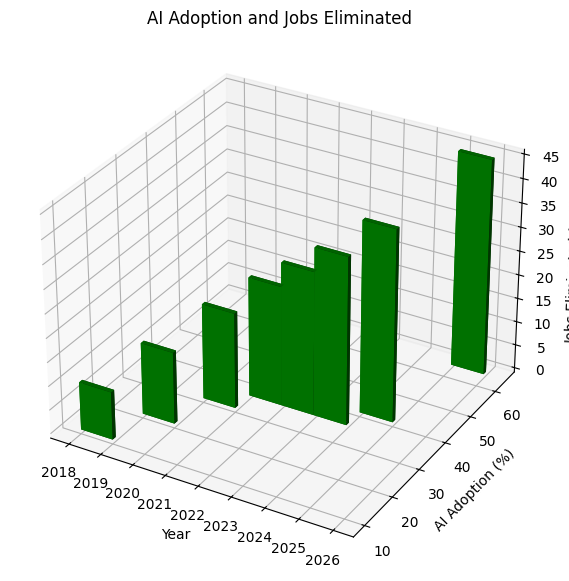

In [27]:
# Kiểm tra và chuyển đổi dữ liệu cho các cột nếu cần
if df['AI Adoption (%)'].dtype == 'object':
    df['AI Adoption (%)'] = df['AI Adoption (%)'].str.rstrip('%').astype(float)

if df['Estimated Jobs Eliminated by AI (millions)'].dtype == 'object':
    df['Estimated Jobs Eliminated by AI (millions)'] = df['Estimated Jobs Eliminated by AI (millions)'].astype(float)

# Tạo biểu đồ 3D bar cho AI Adoption và Jobs Eliminated
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Dữ liệu cho các thanh 3D
x = df['Year']
y = df['AI Adoption (%)']
z = np.zeros(len(df))  # Bắt đầu từ 0 cho trục Z

dx = np.ones(len(df))  # Độ rộng thanh theo trục X
dy = np.ones(len(df))  # Độ rộng thanh theo trục Y
dz = df['Estimated Jobs Eliminated by AI (millions)']  # Chiều cao thanh theo trục Z

# Vẽ thanh 3D
ax.bar3d(x, y, z, dx, dy, dz, color='green')

# Thiết lập tiêu đề và nhãn trục
ax.set_title('AI Adoption and Jobs Eliminated')
ax.set_xlabel('Year')
ax.set_ylabel('AI Adoption (%)')
ax.set_zlabel('Jobs Eliminated (millions)')

# Hiển thị biểu đồ
plt.show()

In [28]:
# Create a figure
fig = go.Figure()

# Add AI Software Revenue trace
fig.add_trace(go.Scatter(x=df['Year'], y=df['AI Software Revenue(in Billions)'],
                         mode='lines+markers',
                         name='AI Software Revenue (Billions)'))

# Add Global AI Market Value trace
fig.add_trace(go.Scatter(x=df['Year'], y=df['Global AI Market Value(in Billions)'],
                         mode='lines+markers',
                         name='Global AI Market Value (Billions)',
                         line=dict(color='orange')))

# Update the layout
fig.update_layout(title='AI Software Revenue and Global AI Market Value Growth (2018-2022)',
                  xaxis_title='Year',
                  yaxis_title='Billions',
                  legend_title='Metrics')

# Show the figure
fig.show()

In [29]:
# Ensure 'Global AI Market Value (in Billions)' is in float
if df['Global AI Market Value(in Billions)'].dtype == 'object':
    df['Global AI Market Value(in Billions)'] = df['Global AI Market Value(in Billions)'].astype(float)

# Create a Waterfall chart for 'Global AI Market Value (in Billions)'
fig = go.Figure(go.Waterfall(
    x=df['Year'],
    y=df['Global AI Market Value(in Billions)'],
    text=df['Global AI Market Value(in Billions)'],
    textposition="outside",
    decreasing={"marker": {"color": "red"}},
    increasing={"marker": {"color": "green"}},
    totals={"marker": {"color": "blue"}},
    connector={"line": {"color": "gray"}},
))

# Update layout
fig.update_layout(
    title="Waterfall Chart: Global AI Market Value (in Billions)",
    xaxis_title="Year",
    yaxis_title="Market Value (Billions)",
    showlegend=False
)

# Show the plot
fig.show()

In [30]:
# Create a figure
fig = go.Figure()

# Add Organizations Believing AI Provides Competitive Edge trace
fig.add_trace(go.Scatter(x=df['Year'], y=df['Organizations Believing AI Provides Competitive Edge'].str.rstrip('%').astype(float),
                         mode='lines+markers',
                         name='Believing AI Provides Competitive Edge (%)',
                         line=dict(color='blue')))

# Add Companies Prioritizing AI in Strategy trace
fig.add_trace(go.Scatter(x=df['Year'], y=df['Companies Prioritizing AI in Strategy'].str.rstrip('%').astype(float),
                         mode='lines+markers',
                         name='Companies Prioritizing AI in Strategy (%)',
                         line=dict(color='green')))

# Update the layout
fig.update_layout(title='Organizations Believing AI Provides Competitive Edge vs Companies Prioritizing AI in Strategy (2018-2022)',
                  xaxis_title='Year',
                  yaxis_title='Percentage (%)',
                  legend_title='Metrics')

# Show the figure
fig.show()


In [31]:
# Creating the line chart for estimated revenue increase from AI
fig = px.line(df, x='Year', y='Estimated Revenue Increase from AI (trillions USD)',
              title='Estimated Revenue Increase from AI (Trillions USD)',
              labels={'Estimated Revenue Increase from AI (trillions USD)': 'Revenue Increase (Trillions USD)', 'Year': 'Year'})

# Show the figure
fig.show()

In [32]:
# Creating the line chart for Expected Increase in Employee Productivity Due to AI
fig = px.line(df, x='Year', y='Expected Increase in Employee Productivity Due to AI (%)',
              title='Expected Increase in Employee Productivity Due to AI (%)',
              labels={'Expected Increase in Employee Productivity Due to AI (%)': 'Productivity Increase (%)', 'Year': 'Year'})

# Show the figure
fig.show()